In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Transition matrix
transition_matrix = np.array([
    [0.9, 0.05, 0.02, 0.02, 0.005, 0.005],
    [0.03, 0.85, 0.05, 0.03, 0.02, 0.02],
    [0.01, 0.02, 0.9, 0.03, 0.02, 0.02],
    [0.008, 0.01, 0.02, 0.9, 0.04, 0.02],
    [0.005, 0.005, 0.01, 0.03, 0.9, 0.03],
    [0.004, 0.004, 0.008, 0.01, 0.05, 0.925]
])

In [2]:
# Initial state
initial_state = np.array([30, 20, 15, 10, 8, 7]) / 100  # Convert percentages to fractions

# Simulate the Markov Chain
num_steps = 5
brand_names = ['Maruti', 'Hyundai', 'Mahindra', 'Tata', 'Toyota', 'Honda']
market_shares_over_time = [initial_state]

for _ in range(num_steps):
    next_state = np.dot(initial_state, transition_matrix)
    market_shares_over_time.append(next_state)
    initial_state = next_state

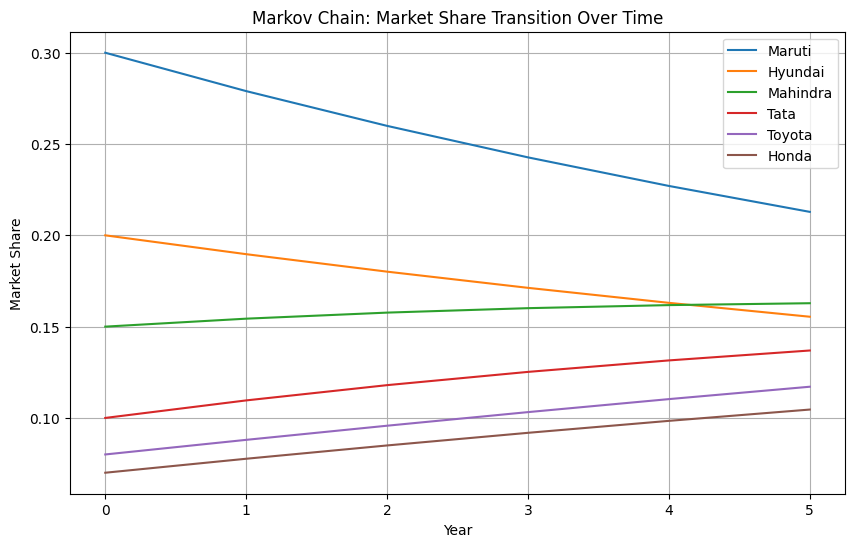

In [3]:
# Plotting market shares over time
market_shares_array = np.array(market_shares_over_time).T
plt.figure(figsize=(10, 6))

for i in range(len(market_shares_array)):
    plt.plot(range(num_steps + 1), market_shares_array[i], label=brand_names[i])

plt.xlabel('Year')
plt.ylabel('Market Share')
plt.title('Markov Chain: Market Share Transition Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# Calculate the steady-state probabilities
eigenvalues, eigenvectors = np.linalg.eig(transition_matrix.T)
steady_state_probabilities = np.abs(eigenvectors[:, 0] / eigenvectors[:, 0].sum())

In [5]:
# Display steady-state probabilities
print("\nSteady-State Probabilities:")
for i, prob in enumerate(steady_state_probabilities):
    print(f'{brand_names[i]}: {prob:.4f}')


Steady-State Probabilities:
Maruti: 0.0805
Hyundai: 0.0773
Mahindra: 0.1470
Tata: 0.1959
Toyota: 0.2606
Honda: 0.2387
